### Regression

Build regression models for the default of Bike Sharing dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

- Study the RMSE & R2

In [1]:
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Explore the data

In [11]:
path = r"C:\Users\Nafiseh\Documents\data science\machine learning\metroCollege\final project\regression\Bike-Sharing-Dataset"

df = pd.read_csv(path + r'\day.csv' , header = 0)

In [12]:
len(df)

731

In [13]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


<pre> 
- instant and dteday columns are not useful in modelling.
- Casual and registered columns will not be used for modelling the total NO of rental bikes.
- One-hot Coding transformation is needed for season, mnth, weekday and weathersit columns.
</pre>

In [24]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


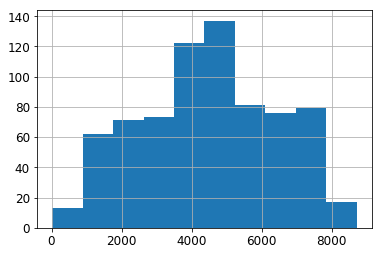

In [25]:
df['cnt'].hist()
plt.show()

In [16]:
# new dataframe with relative cloumns
df = df.drop(['instant', 'dteday','casual','registered'],axis=1) 

In [17]:
df.shape

(731, 12)

In [18]:
df_encoded = pd.get_dummies(df, columns = ['season','mnth','weekday', 'weathersit'])

In [19]:
df_encoded.shape

(731, 34)

In [27]:
df_encoded.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.363625,0.805833,0.160446,985,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,0.196364,0.189405,0.437273,0.248309,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,1562,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,1600,1,0,...,0,0,0,1,0,0,0,1,0,0


----

## Create the train & test set

In [20]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_encoded, test_size=0.2, random_state=42)

-----

## Prepare the data for ML algorithms

In [21]:
X_train = train_set.drop("cnt", axis=1) # drop labels for training set
y_train = train_set["cnt"].copy()

X_test = test_set.drop("cnt", axis=1) # drop labels for training set
y_test = test_set["cnt"].copy()

In [26]:
X_train.shape ,y_train.shape, X_test.shape , y_test.shape

((584, 33), (584,), (147, 33), (147,))

## Train different models

- Model evaluation Metric: RMSE

### 1. Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(LinearRegression(), X_train, y_train, scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-lin_scores)
print(lin_rmse_scores)
print(lin_rmse_scores.mean())

[ 791.38572761  858.86034315  885.46777747  771.17673383]
826.722645514


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

param_grid = [{'normalize': [True, False]}]

grid_search = GridSearchCV(LinearRegression(), param_grid, cv= 10,
                       scoring='neg_mean_squared_error', n_jobs = -1)
grid_search.fit(X_train,y_train)

print ("best parameter: ", grid_search.best_params_)

best_model_lr = grid_search.best_estimator_
print ("best_model: ", best_model_lr)

best parameter:  {'normalize': False}
best_model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [35]:
print(np.sqrt(-grid_search.best_score_))

815.747149277


In [33]:
# Predicting the Test set results
y_pred_lr = best_model_lr.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred_lr = best_model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
print("The RMSE for Linear Regression is: " , rmse)

r2 = r2_score(y_test, y_pred_lr)
print("The R2 for Linear Regression is: ", r2)

The RMSE for Linear Regression is:  797.200207017
The R2 for Linear Regression is:  0.841509519649


### 2. Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [46]:
X_train_poly.shape , X_test_poly.shape

((584, 595), (147, 595))

In [52]:
#from sklearn.linear_model import LinearRegression
param_grid = [{'normalize': [True, False]}]

grid_search = GridSearchCV(LinearRegression(), param_grid, cv= 4,
                       scoring='neg_mean_squared_error', n_jobs = -1)
grid_search.fit(X_train_poly,y_train)
print ("best parameter: ", grid_search.best_params_)

best_model_plr = grid_search.best_estimator_
print ("best_model: ", best_model_plr)

best parameter:  {'normalize': False}
best_model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [53]:
y_pred_plr = best_model_plr.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred_plr)
rmse_plr = np.sqrt(mse)
print("The RMSE for Linear Regression is: " , rmse_plr)

r2_plr = r2_score(y_test, y_pred_plr)
print("The R2 for Linear Regression is: ", r2_plr)

The RMSE for Linear Regression is:  7.77833437573e+14
The R2 for Linear Regression is:  -1.50883445714e+23


In [54]:
from sklearn.linear_model import Ridge

param_grid = [{'alpha': [0.01,0.1,1,10]}]
grid_search_rr = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rr.fit(X_train_poly, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.01, 0.1, 1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [55]:
best_model_ridge = grid_search_rr.best_estimator_

In [59]:
y_pred_r = best_model_ridge.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred_r)
rmse_r = np.sqrt(mse)
print("The RMSE for Polynomial Linear Regression is: " , rmse_r)

r2_r = r2_score(y_test, y_pred_r)
print("The R2 for Polynomial Linear Regression is: ", r2_r)

The RMSE for Polynomial Linear Regression is:  703.811191583
The R2 for Polynomial Linear Regression is:  0.87646764724


### 3. SVR

In [74]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

In [75]:
from sklearn.svm import SVR
param_grid = [{
        'kernel': ['linear', 'rbf'] ,
            'C': [ 0.1, 1, 10, 20]
            }]


grid_search_svr = GridSearchCV(SVR(), param_grid, cv= 4,
                                scoring='neg_mean_squared_error', n_jobs = -1)

grid_search_svr.fit(X_train_sc,y_train)
print ("best parameter: ", grid_search_svr.best_params_)

best_model_svr = grid_search_svr.best_estimator_
print ("best_model: ", best_model_svr)

best parameter:  {'kernel': 'linear', 'C': 20}
best_model:  SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [76]:
# Predicting the Test set results
y_pred_svr = best_model_svr.predict(X_test_sc)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse)
print("The RMSE for SVR is: " , rmse_svr)

r2_svr = r2_score(y_test, y_pred_svr)
print("The R2 for SVR is: ", r2_svr)

The RMSE for SVR is:  783.25675419
The R2 for SVR is:  0.847005198948


### 4. Random Forest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor

param_grid = [{'n_estimators': [50, 100, 200 , 300],
              'max_depth': [3, 7, 10 , 14] }]

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), 
                              param_grid, cv= 5,
                                scoring='neg_mean_squared_error', n_jobs = -1)

grid_search_rf.fit(X_train,y_train)
print ("best parameter: ", grid_search_rf.best_params_)

best_model_rf = grid_search_rf.best_estimator_
print ("best_model: ", best_model_rf)

best parameter:  {'n_estimators': 300, 'max_depth': 14}
best_model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)


In [78]:
# Predicting the Test set results
y_pred_rf = best_model_rf.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse)
print("The RMSE for RandomForests is: " , rmse_rf)

r2_rf = r2_score(y_test, y_pred_rf)
print("The R2 for RandomForests is: ", r2_rf)

The RMSE for RandomForests is:  683.654434506
The R2 for RandomForests is:  0.883442118201


### y_pred vs y_test

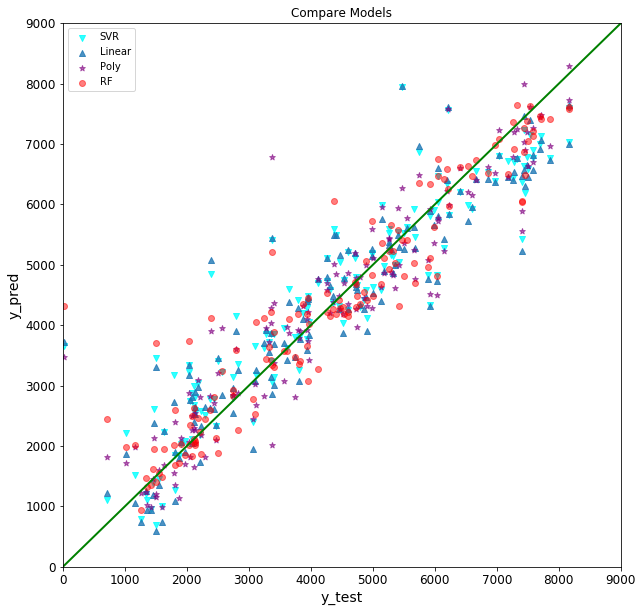

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(x=np.array(y_test).ravel(), y=y_pred_svr, c= 'cyan', 
            alpha = 0.8, label = 'SVR', marker = 'v')
plt.scatter(x=np.array(y_test).ravel(), y=y_pred_lr, 
            alpha = 0.8, label = 'Linear' , marker = '^')
plt.scatter(x=np.array(y_test).ravel(), y=y_pred_r, c= 'purple',
            alpha = 0.6, label = 'Poly' , marker = '*')
plt.scatter(x=np.array(y_test).ravel(), y=y_pred_rf, c= 'red',
            alpha = 0.5, label = 'RF')
#filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.plot([0,9000],[0,9000], 'g-', linewidth = 2)
plt.xlim([0,9000])
plt.ylim([0,9000])
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.legend()
plt.title("Compare Models")
plt.show()

### Compare RMSE and R2

In [80]:
scores = {"Model": ["Linear Regression","Polynomial Regression", "SVR", "RandomForests"],
        "RMSE": [rmse , rmse_r, rmse_svr, rmse_rf],
          "R2": [r2 , r2_r, r2_svr, r2_rf]
         }

error_df = pd.DataFrame(scores)
error_df = error_df [["Model", "RMSE","R2"]]
error_df

,Model,RMSE,R2
0,Linear Regression,797.200207,0.841510
1,Polynomial Regression,703.811192,0.876468
2,SVR,783.256754,0.847005
3,RandomForests,683.654435,0.883442
